In [36]:
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, LinearConstraint

In [37]:
 # Lee la matriz desde el archivo
data1 = np.loadtxt("Data/Homework3pt3DataCSV1.txt")
data2 = np.loadtxt("Data/Homework3pt3DataCSV2.txt")
data3 = np.loadtxt("Data/Homework3pt3DataCSV3.txt")
data4 = np.loadtxt("Data/Homework3pt3DataCSV4.txt")
data5 = np.loadtxt("Data/Homework3pt3DataCSV5.txt")

In [38]:
# 3 bayesian models
# A. Early strong fusion model
# B. Probability matching model
# C. Late strong fusion model

# A) Early Strong Fusion Model

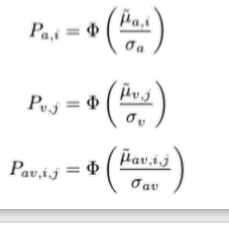

In [39]:
def pyscometric(I, c, sigma):
    return norm.cdf((I-c)/sigma)

In [40]:
def weight(sigma_a, sigma_v):
    wa= sigma_v**2/(sigma_a**2 + sigma_v**2)
    return wa
def mu_av_trans(mu_a, mu_v, sigma_a, sigma_v):
    wa=weight(sigma_a, sigma_v)
    t=wa*mu_a +(1-wa)*mu_v
    return t

def sigma_av_trans(sigma_a, sigma_v):
    wa=weight(sigma_a, sigma_v)
    t=wa**2*sigma_a**2 + (1-wa)**2*sigma_v**2
    t=np.sqrt(t)
    return t

In [41]:
def pyscometric_audiovisual(mu_av, sigma_av):
    return norm.cdf(mu_av/sigma_av)

In [42]:
def negative_log_likelihood(params, data, N_trial):
    mu_a_tilde = np.array([1,2,3,4,5]) - params[0]
    mu_v_tilde = np.array([1,2,3,4,5]) - params[1]
    sigma_a = np.exp(params[2])
    sigma_v = np.exp(params[3])
    p_est = np.zeros((7, 5))

    p_est[0, :] = norm.cdf(mu_a_tilde / sigma_a)
    p_est[1, :] = norm.cdf(mu_v_tilde / sigma_v)
    w_a = sigma_v**2 / (sigma_a**2 + sigma_v**2)
    sigma_av = np.sqrt((sigma_a**2 * sigma_v**2) / (sigma_a**2 + sigma_v**2))

    for a in range(5):
        for v in range(5):
            mu_av_tilde = w_a * mu_a_tilde[a] + (1 - w_a) * mu_v_tilde[v]
            p_est[v + 2, a] = norm.cdf(mu_av_tilde / sigma_av)
    NegLL = 0
    for r in range(7):
        for c in range(5):
            NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
    return NegLL

In [43]:
N_trial=24
Nparams = 4
params0 = np.random.rand(Nparams) - 0.5

options = {'maxiter': 1e5, 'disp': False}

optimized_parameters = minimize(negative_log_likelihood, params0, args=(data1,N_trial), options=options)
params = optimized_parameters.x
c_a = params[0]
c_v = params[1]
sigma_a = np.exp(params[2])
sigma_v = np.exp(params[3])
NegLL = optimized_parameters.fun

print(f"c_a: {c_a}")
print(f"c_v: {c_v}")
print(f"sigma_a: {sigma_a}")
print(f"sigma_v: {sigma_v}")
print(f"NegLL: {NegLL}")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\63290820.py:20: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\63290820.py:20: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\63290820.py:20: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\63290820.py:20: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\63290820.py:20: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


c_a: 3.3116919939933984
c_v: 1.8576907276041612
sigma_a: 0.9029543918692325
sigma_v: 0.875233358372636
NegLL: 72.80160664670258


In [44]:
NLL=negative_log_likelihood(optimized_parameters.x, data1, N_trial)
print(NLL)

72.80160664670258


In [45]:
c_a=optimized_parameters.x[0]
sigma_a=optimized_parameters.x[1]
c_v=optimized_parameters.x[2]
sigma_v=optimized_parameters.x[3]

### Scatter plot

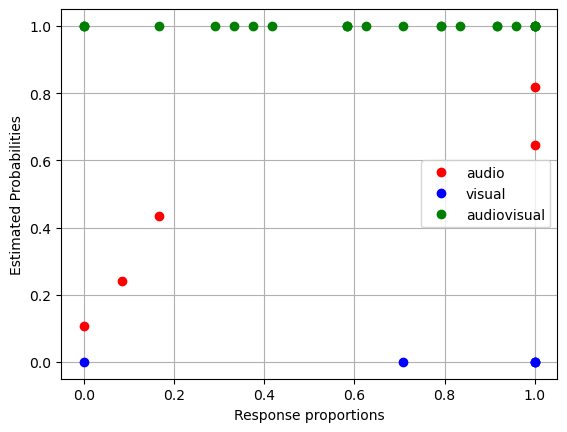

In [46]:
n_stim=24
color=["red","blue"]
label=["audio", "visual"]
for pos in [0,1]: #Unisensorial
    prob=[]
    for j in range(1,6):
        prob.append(pyscometric(j,optimized_parameters.x[int(2*pos)],optimized_parameters.x[int(2*pos)+1]))
    plt.plot(data1[pos]/n_stim, prob, 'o', color=color[pos], label=label[pos])
mu=np.array([1,2,3,4,5])
mu_v=mu.copy()
mu_a=mu.copy()
mu_a_gorro=mu_a - optimized_parameters.x[0]
mu_v_gorro=mu_v - optimized_parameters.x[2]
mu_av_gorro=np.full((5,5), 0.)
for i in range(5):
    for j in range(5):
            a=mu_av_trans(mu_a_gorro[i], mu_v_gorro[j], optimized_parameters.x[1], optimized_parameters.x[3])
            mu_av_gorro[i][j]=a
sigma_av=sigma_av_trans(optimized_parameters.x[1], optimized_parameters.x[3])
probabilities=[]
for pos in [2,3,4,5,6]:
    for j in range(5):
        probabilities.append(pyscometric_audiovisual(mu_av_gorro[pos-2][j], sigma_av))

plt.plot(data1[2:7].flatten()/n_stim, probabilities, 'o', color="green", label="audiovisual")

plt.xlabel("Response proportions")
plt.ylabel("Estimated Probabilities")
plt.grid()
plt.legend()

In [47]:
from scipy.optimize import minimize
import numpy as np
from scipy.stats import norm, binom
from sklearn.model_selection import KFold
if False:
    # Set up cross-validation
    num_folds = 7
    kf = KFold(n_splits=num_folds, shuffle=True)

    # Initialize an array to store results for each fold
    neg_ll_results = np.zeros(num_folds)

    # Your optimization options
    options = {'maxiter': 1e5, 'disp': False}

    for fold, (train_idx, val_idx) in enumerate(kf.split(data1)):
        print(train_idx)
        print(val_idx)
        # Split the data into training and validation sets
        data_train, data_val = data1[train_idx], data1[val_idx]
        
        # Run optimization on the training set
        optimized_parameters = minimize(negative_log_likelihood, params0, args=(data_train, N_trial), options=options)
        params = optimized_parameters.x

        # Evaluate the negative log likelihood on the validation set
        neg_ll_val = negative_log_likelihood(params, data_val, N_trial)
        neg_ll_results[fold] = neg_ll_val

    # Calculate and print the mean negative log likelihood across folds
    mean_neg_ll = np.mean(neg_ll_results)
    print(f"Mean Negative Log Likelihood across folds: {mean_neg_ll}")
    import warnings
    warnings.filterwarnings('ignore')

# B) Probability Matching model

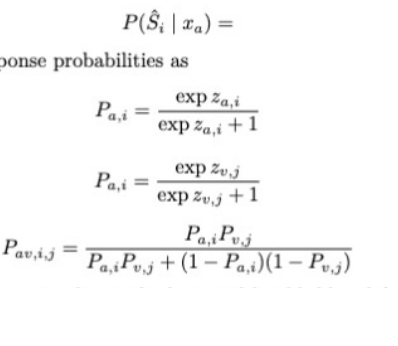

In [48]:
def softmax(z,N_trial):
    return np.exp(z/N_trial)/(np.exp(z/N_trial)+1)

In [49]:
def prob_av(z_a, z_v, N_trial):
    num=softmax(z_a, N_trial)*softmax(z_v, N_trial)
    dem=num + softmax((N_trial-z_a),N_trial)*softmax((N_trial -z_v),N_trial)
    return num/dem

In [50]:
def negative_log_likelihood(params, data, N_trial):
    pa = np.exp(params[0:5]) / (np.exp(params[0:5]) + 1)
    pv = np.exp(params[5:10]) / (np.exp(params[5:10]) + 1)
    pav = np.zeros((5, 5))

    for a in range(5):
        for v in range(5):
            pav[v, a] = pa[a] * pv[v] / (pa[a] * pv[v] + (1 - pa[a]) * (1 - pv[v]))

    p_est = np.vstack([pa, pv, pav])

    NegLL = 0
    for r in range(7):
        for c in range(5):
            NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))

    return NegLL

In [51]:
N_trial=24
Nparams = 10
params0 = np.random.rand(Nparams) - 0.5

options = {'maxiter': 1e5, 'disp': False}

optimized_parameters = minimize(negative_log_likelihood, params0, args=(data1,N_trial), options=options)

params = optimized_parameters.x
z_match=params
pa = np.exp(params[0:5]) / (np.exp(params[0:5]) + 1)
pv = np.exp(params[5:10]) / (np.exp(params[5:10]) + 1)
NegLL = optimized_parameters.fun

print(f"pa: {pa}")
print(f"pv: {pv}")
print(f"NegLL: {NegLL}")
print(f"Params{params}")

pa: [0.03514485 0.09161576 0.1796511  0.92105276 0.96137555]
pv: [0.0486152  0.69862319 0.9482924  0.97297382 0.97866876]
NegLL: 47.341626079780454
Params[-3.31249989 -2.29406416 -1.51871313  2.45673751  3.21447972 -2.97398231
  0.8407502   2.90905813  3.5835511   3.82602063]


In [52]:
NLL=negative_log_likelihood(optimized_parameters.x, data1, n_stim)
print(NLL)

47.341626079780454


### Scatter plot

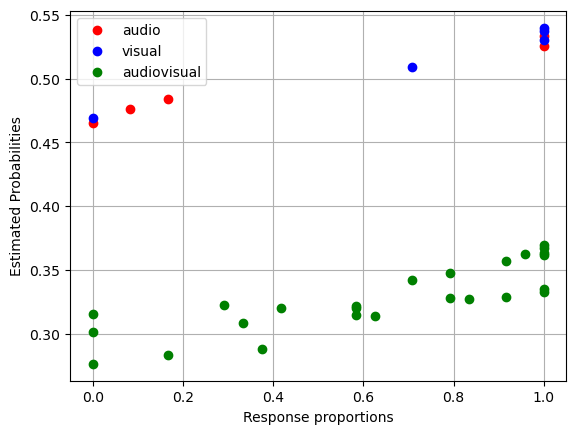

In [53]:
N_trial=24
color=["red","blue"]
label=["audio", "visual"]
for pos in [0,1]: #Unisensorial
    probabilities=[]
    for i in optimized_parameters.x[pos*5:pos*5+5]:
        probabilities.append(softmax(i, N_trial))
    plt.plot(data1[pos]/n_stim, probabilities, 'o', color=color[pos], label=label[pos])
probabilities=[]
for pos in [2,3,4,5,6]:
        indx=pos-2
        z_a=optimized_parameters.x[indx]
        for j in range(5,10):
            z_v=optimized_parameters.x[j]
            probabilities.append(prob_av(z_a, z_v, N_trial))
plt.plot(data1[2:7].flatten()/n_stim, probabilities, 'o', color="green", label="audiovisual")

plt.xlabel("Response proportions")
plt.ylabel("Estimated Probabilities")
plt.grid()
plt.legend()

# C) Late Strong Fusion Model

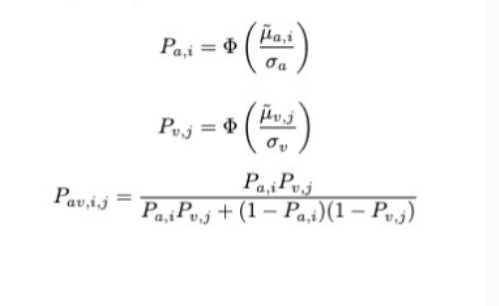

In [54]:
def negative_log_likelihood(params, data, N_trial):
    mu_a_tilde = np.array([1,2,3,4,5]) - params[0]
    mu_v_tilde = np.array([1,2,3,4,5]) - params[1]
    sigma_a = np.exp(params[2])
    sigma_v = np.exp(params[3])
    p_est = np.zeros((2, 5))

    p_est[0, :] = norm.cdf(mu_a_tilde / sigma_a)
    p_est[1, :] = norm.cdf(mu_v_tilde / sigma_v)

    pa = p_est[0,:]
    pv = p_est[1,:]
    pav = np.zeros((5, 5))

    for a in range(5):
        for v in range(5):
            pav[v, a] = pa[a] * pv[v] / (pa[a] * pv[v] + (1 - pa[a]) * (1 - pv[v]))
    p_est = np.vstack([p_est, pav])

    NegLL = 0
    for r in range(7):
        for c in range(5):
            NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
    return NegLL

In [55]:
N_trial=24


Nparams = 4
params0 = np.random.rand(Nparams) - 0.5

options = {'maxiter': 1e5, 'disp': False}

optimized_parameters = minimize(negative_log_likelihood, params0, args=(data1,N_trial), options=options)

params = optimized_parameters.x
c_a = params[0]
c_v = params[1]
sigma_a = np.exp(params[2])
sigma_v = np.exp(params[3])
pa = np.exp(z_match[0:5]) / (np.exp(z_match[0:5]) + 1)
pv = np.exp(z_match[5:10]) / (np.exp(z_match[5:10]) + 1)
NegLL = optimized_parameters.fun

print(f"c_a: {c_a}")
print(f"c_v: {c_v}")
print(f"sigma_a: {sigma_a}")
print(f"sigma_v: {sigma_v}")
print(f"pa: {pa}")
print(f"pv: {pv}")
print(f"NegLL: {NegLL}")
print(f"Params{params}")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\484336392.py:23: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\484336392.py:23: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22060\484336392.py:23: RuntimeWarning: divide by zero encountered in log
  NegLL -= np.log(binom.pmf(data[r, c], N_trial, p_est[r, c]))
c:\Users\Usuario\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract

c_a: 3.2269960140274225
c_v: 1.9353986420226028
sigma_a: 1.3406117732789022
sigma_v: 1.3344488949674316
pa: [0.03514485 0.09161576 0.1796511  0.92105276 0.96137555]
pv: [0.0486152  0.69862319 0.9482924  0.97297382 0.97866876]
NegLL: 95.30782910293738
Params[3.22699601 1.93539864 0.29312606 0.28851839]


In [56]:
NLL=negative_log_likelihood(optimized_parameters.x, data1, N_trial)
print(NLL)

95.30782910293738
